<a href="https://colab.research.google.com/github/RafaelTheodoroCampos/Analysis_of_Daily_Electricity_Consumption_in_Brazil/blob/main/TrabalhoResmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

#Importando os dados
df = pd.read_csv('/content/energy_demand_hourly_brazil.csv',index_col = 'index',parse_dates = True)
figsize = (22,7)


In [2]:
#Informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201318 entries, 2000-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  201318 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [3]:
#Aparência da planilha
print(df.head())

                     hourly_demand
index                             
2000-01-01 00:00:00        34673.9
2000-01-01 01:00:00        33503.0
2000-01-01 02:00:00        32287.6
2000-01-01 03:00:00        31059.4
2000-01-01 04:00:00        30272.7


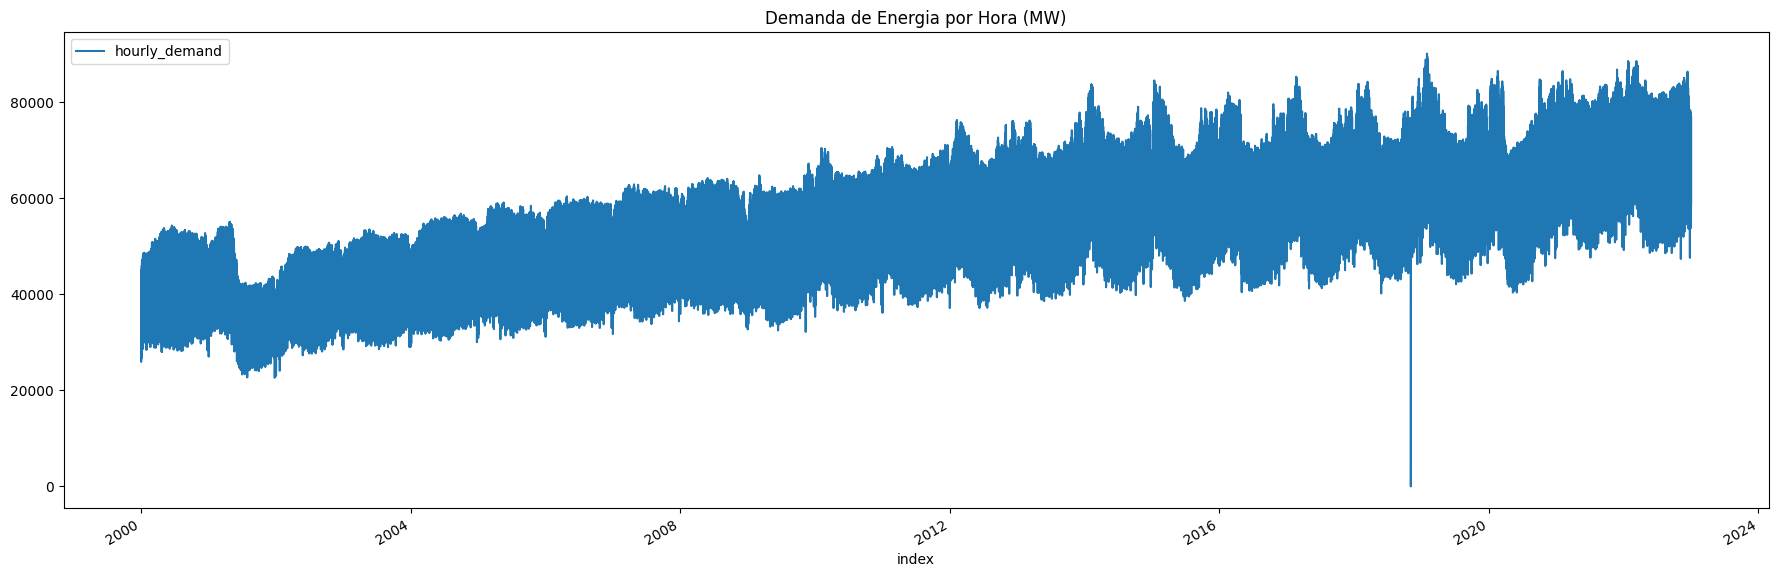

In [4]:
#Gráfico de consumo por hora ao longo dos anos
df.plot(figsize = figsize,title = 'Demanda de Energia por Hora (MW)')
plt.show()

In [9]:
df['hora'] = df.index.hour
df['dia_semana'] = df.index.day_of_week
df['dia_mes'] = df.index.day
df['dia_ano'] = df.index.day_of_year
df['mes'] = df.index.month
df['trimestre'] = df.index.quarter
df['ano'] = df.index.year
df.head()

,hourly_demand,hora,dia_semana,dia_mes,dia_ano,mes,trimestre,ano
index,,,,,,,,
2000-01-01 00:00:00,34673.9,0,5,1,1,1,1,2000
2000-01-01 01:00:00,33503.0,1,5,1,1,1,1,2000
2000-01-01 02:00:00,32287.6,2,5,1,1,1,1,2000
2000-01-01 03:00:00,31059.4,3,5,1,1,1,1,2000
2000-01-01 04:00:00,30272.7,4,5,1,1,1,1,2000


# Objetivo é utilizar os dados dos anos 2000 até 2021 e tentar prever a estimativa para o anos de 2022, logo em seguida comparar com o valor real e discutir os resultados

y treino: (192581,) y teste: (8761,)
x treino: (192581, 7) x teste: (8761, 7)


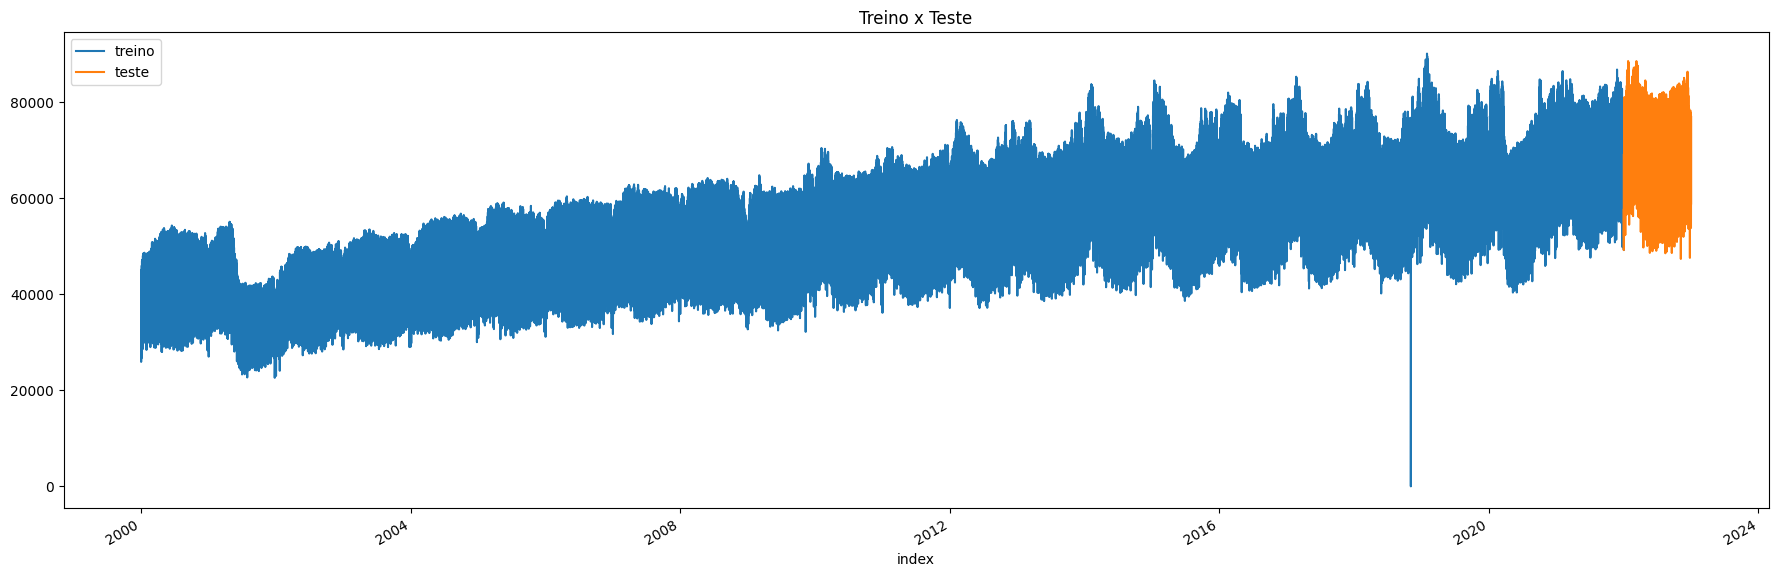

In [8]:
# Separando os dados em conjuntos de treinamento e teste com base em uma data divisória
data_divisoria = '2022-01-01'

# Criando um novo DataFrame para análise e visualização
tt_df = df[['hourly_demand']].copy()

# Adicionando colunas 'treino' e 'teste' ao DataFrame
tt_df['treino'] = df['hourly_demand'].loc[:data_divisoria]
tt_df['teste'] = df['hourly_demand'].loc[data_divisoria:]

# Separando os valores da variável alvo (consumo de energia) nos conjuntos de treinamento e teste
y_train, y_test = df['hourly_demand'].loc[:data_divisoria].values, df['hourly_demand'].loc[data_divisoria:].values

# Separando os valores das variáveis preditoras (exceto a coluna 'hourly_demand') nos conjuntos de treinamento e teste
x_train, x_test = df.drop(['hourly_demand'], axis=1).loc[:data_divisoria].values, df.drop(['hourly_demand'], axis=1).loc[data_divisoria:].values

# Imprimindo o número de elementos nos conjuntos de treinamento e teste para a variável alvo
print('y treino:', y_train.shape, 'y teste:', y_test.shape)

# Imprimindo o número de elementos nos conjuntos de treinamento e teste para as variáveis preditoras
print('x treino:', x_train.shape, 'x teste:', x_test.shape)

# Visualizando a divisão entre os conjuntos de treinamento e teste
tt_df[['treino', 'teste']].plot(figsize=figsize, title='Treino x Teste')
plt.show()

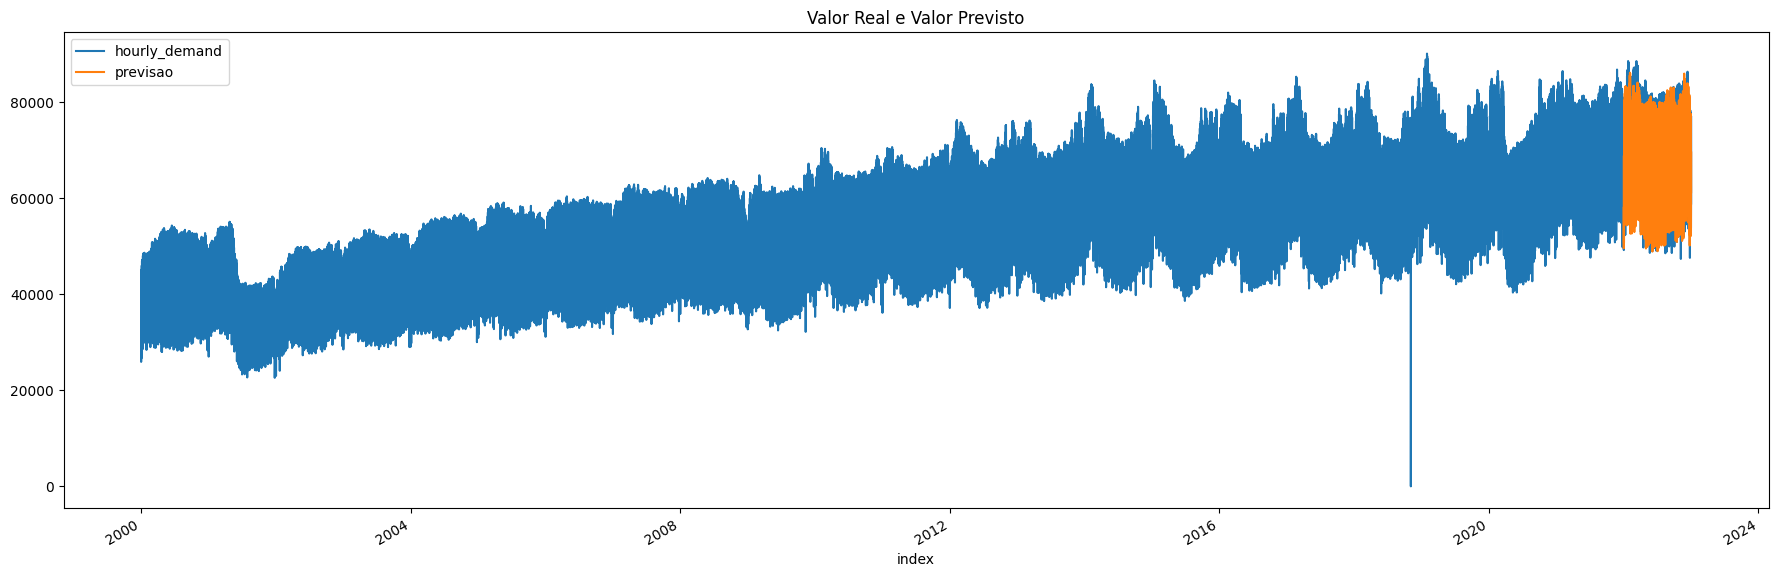

In [10]:
# Criando um modelo de regressão (Random Forest)
reg = RandomForestRegressor(max_depth=100, random_state=0)

# Treinando o modelo utilizando os conjuntos de treinamento
reg.fit(x_train, y_train)

# Realizando a previsão com base nos dados de teste
prediction = reg.predict(x_test)

# Adicionando a coluna 'previsao' ao DataFrame tt_df, contendo a previsão para os dados de teste
tt_df['previsao'] = [None for _ in range(len(tt_df) - len(prediction))] + list(prediction)

# Visualizando os valores reais e previstos no gráfico
tt_df[['hourly_demand', 'previsao']].plot(figsize=figsize, title='Valor Real e Valor Previsto')
plt.show()

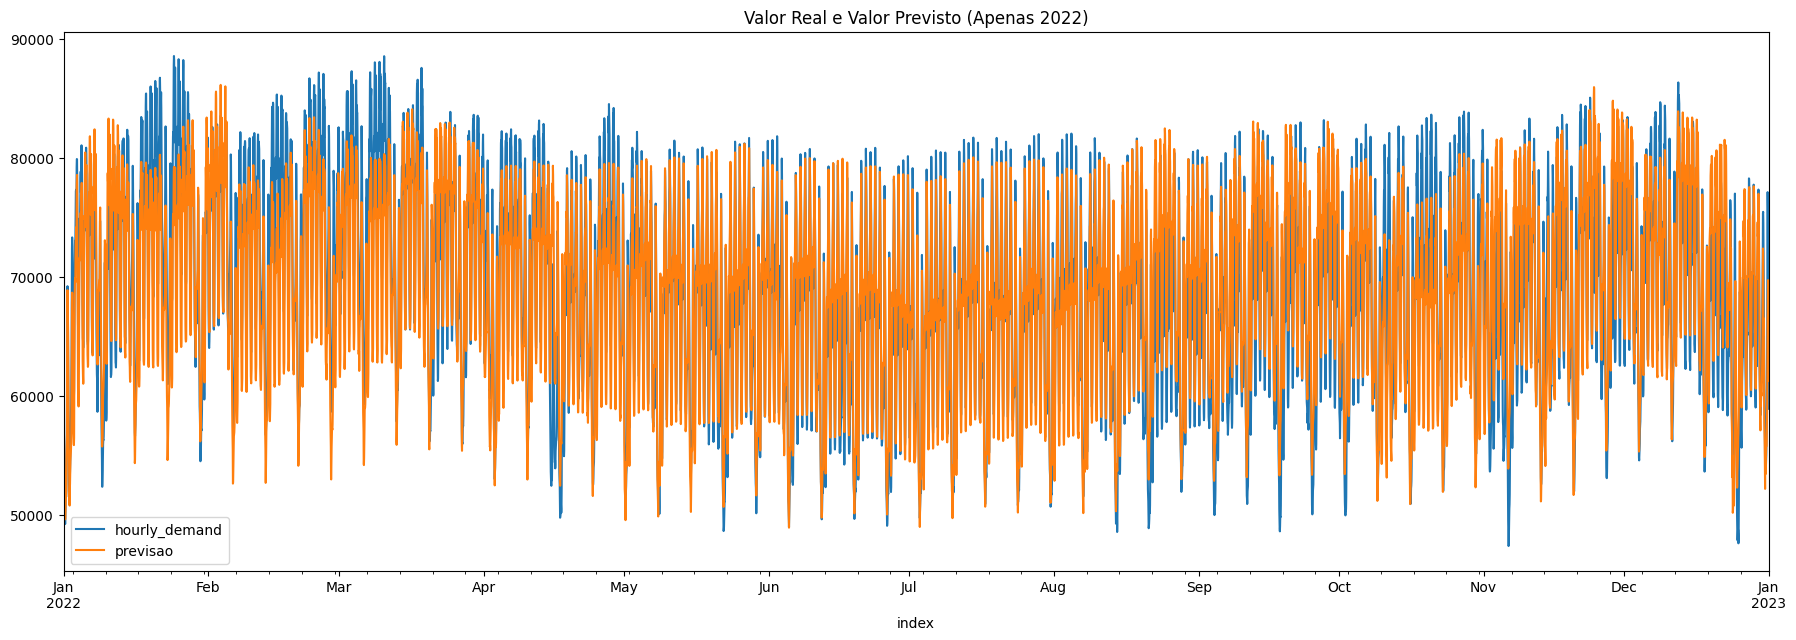

In [11]:
# Plotando um gráfico para comparar os valores reais e previstos apenas para o ano de 2022

# Utilizando o DataFrame tt_df, selecionando as linhas a partir da data de divisão (data_divisoria) até o final do DataFrame
# Em seguida, selecionando as colunas 'hourly_demand' e 'previsao'
subset_df = tt_df.loc[data_divisoria:][['hourly_demand', 'previsao']]

# Plotando o gráfico, utilizando o método plot do DataFrame subset_df
# Configurando o tamanho da figura com figsize
# Definindo o título do gráfico como 'Valor Real e Valor Previsto (Apenas 2022)'
subset_df.plot(figsize=figsize, title='Valor Real e Valor Previsto (Apenas 2022)')

# Exibindo o gráfico
plt.show()

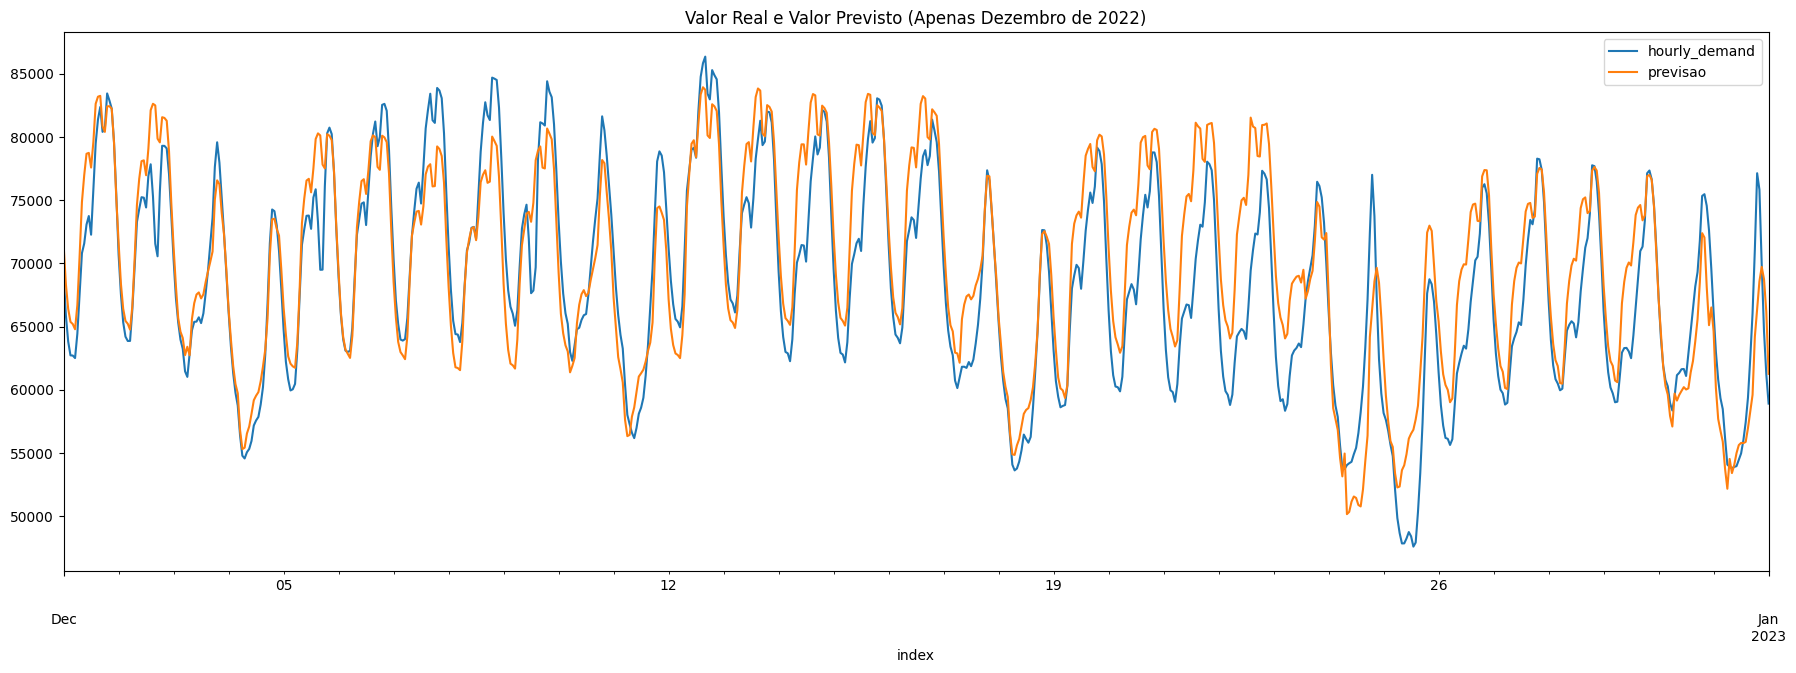

In [12]:
# Plotando um gráfico para comparar os valores reais e previstos apenas para o mês de dezembro de 2022

# Utilizando o DataFrame tt_df, selecionando as linhas a partir de 1º de dezembro de 2022 até o final do DataFrame
# Em seguida, selecionando as colunas 'hourly_demand' e 'previsao'
subset_df = tt_df.loc['2022-12-01':][['hourly_demand', 'previsao']]

# Plotando o gráfico, utilizando o método plot do DataFrame subset_df
# Configurando o tamanho da figura com figsize
# Definindo o título do gráfico como 'Valor Real e Valor Previsto (Apenas Dezembro de 2022)'
subset_df.plot(figsize=figsize, title='Valor Real e Valor Previsto (Apenas Dezembro de 2022)')

# Exibindo o gráfico
plt.show()

RMSE: 3675


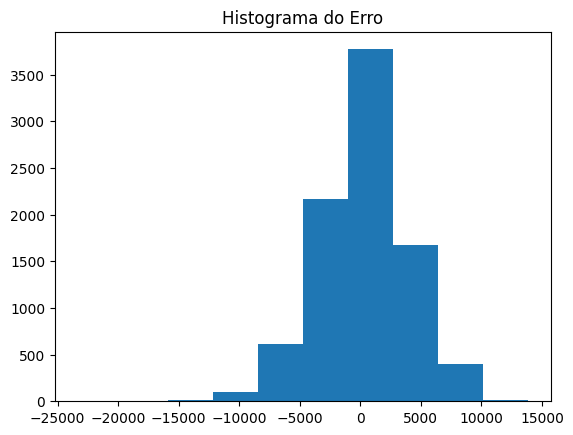

In [13]:
# Calculando o erro entre os valores reais e previstos e calculando a raiz do erro médio quadrático (RMSE)

# Calculando o erro subtraindo os valores reais (y_test) pelos valores previstos (prediction)
err = y_test - prediction

# Calculando o RMSE (Root Mean Square Error), que é a raiz quadrada da média dos erros ao quadrado
# Utilizando a função np.square para elevar ao quadrado cada elemento do array err
# Em seguida, calculando a média dos valores elevados ao quadrado com np.mean
# E por fim, calculando a raiz quadrada com math.sqrt
rmse = math.sqrt(np.square(err).mean())

# Imprimindo o valor do RMSE arredondado
print('RMSE:', round(rmse))

# Plotando um histograma dos erros
_ = plt.hist(err)
plt.title('Histograma do Erro')
plt.show()

O percentil é uma medida estatística que divide um conjunto de dados ordenados em 100 partes iguais. No caso do código, ele calcula o valor que separa os 95% e 50% menores erros do conjunto total. O resultado é arredondado e, em seguida, exibido na saída de impressão.

Esses percentis são úteis para entender a distribuição dos erros e avaliar sua magnitude. O percentil de 95% ajuda a identificar erros extremos ou anômalos, enquanto o percentil de 50% fornece uma medida de tendência central, representando o erro típico ou mediano.

In [14]:
# Cálculo do valor absoluto do erro
abs_err = np.abs(err)  # Calcula o valor absoluto de cada elemento do erro

# Cálculo do percentil de 95% do erro absoluto
percentile95 = np.percentile(abs_err, 95)  # Encontra o limite inferior dos 5% maiores erros

# Cálculo do percentil de 50% (mediana) do erro absoluto
percentile50 = np.percentile(abs_err, 50)  # Encontra o valor que divide o conjunto de erros em dois

# Impressão dos resultados dos percentis
print('Percentil 95%:', round(percentile95))  # Exibe o valor do percentil de 95% arredondado
print('Percentil 50%:', round(percentile50))  # Exibe o valor do percentil de 50% arredondado


Percentil 95%: 7289
Percentil 50%: 2275


In [15]:
# Criando um DataFrame com informações de datas futuras

# Gerando um índice de datas no intervalo de '2023-01-01 01:00:00' até '2024-01-01 00:00:00'
# Utilizando a função pd.date_range, especificando a data de início, data de término e a frequência 'h' (horária)
datas = pd.date_range(start='2023-01-01 01:00:00', end='2024-01-01 00:00:00', freq='h')

# Criando um dicionário com as colunas do DataFrame futuro_df
colunas = {'hora': datas.hour,
           'dia_semana': datas.day_of_week,
           'dia_mes': datas.day,
           'dia_ano': datas.day_of_year,
           'mes': datas.month,
           'trimestre': datas.quarter,
           'ano': datas.year}

# Criando o DataFrame futuro_df a partir do dicionário de colunas
# Utilizando o índice de datas gerado anteriormente
futuro_df = pd.DataFrame(colunas, index=datas)

# Exibindo as primeiras linhas do DataFrame futuro_df
futuro_df.head()


,hora,dia_semana,dia_mes,dia_ano,mes,trimestre,ano
2023-01-01 01:00:00,1,6,1,1,1,1,2023
2023-01-01 02:00:00,2,6,1,1,1,1,2023
2023-01-01 03:00:00,3,6,1,1,1,1,2023
2023-01-01 04:00:00,4,6,1,1,1,1,2023
2023-01-01 05:00:00,5,6,1,1,1,1,2023


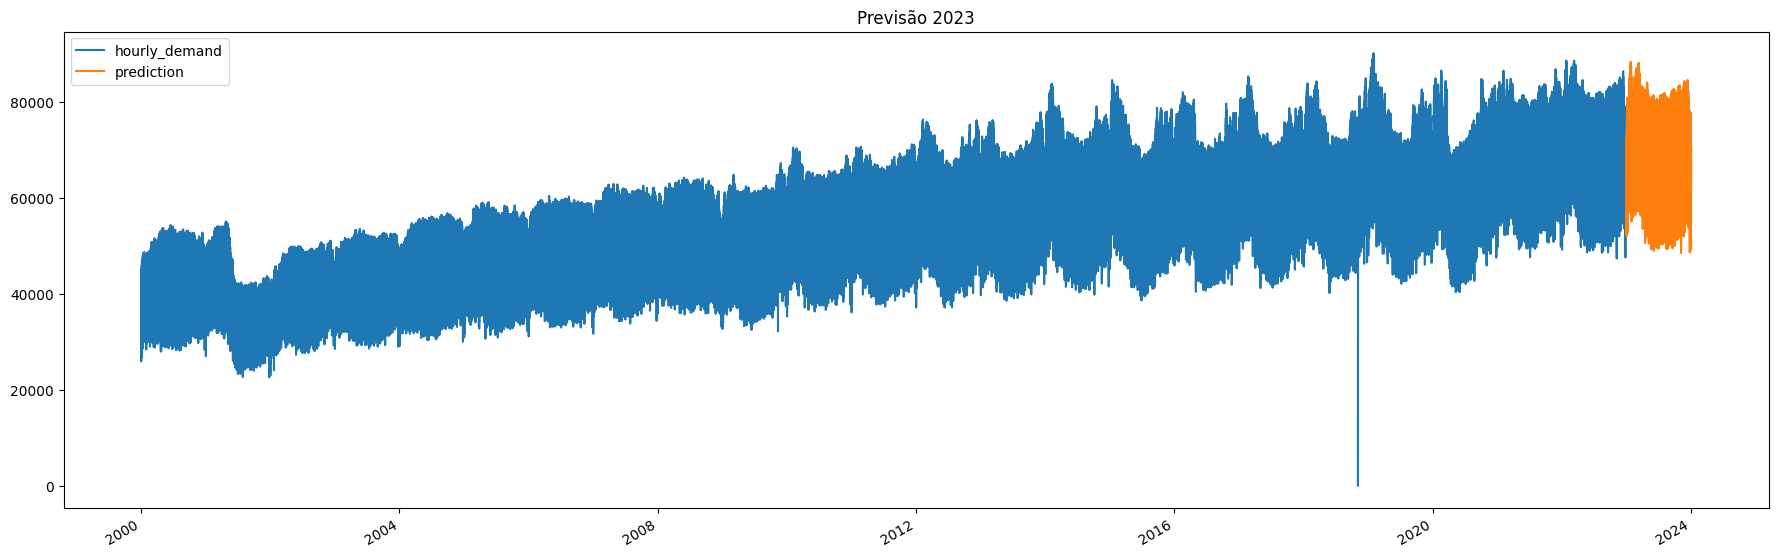

In [16]:
# Preparando os dados para previsão e realizando a previsão com o modelo treinado

# Preparando os dados de treinamento
x_train = df.drop(['hourly_demand'], axis=1).values
y_train = df['hourly_demand'].values

# Preparando os dados de previsão
x_predict = futuro_df.values

# Criando uma instância do modelo de regressão de floresta aleatória
reg = RandomForestRegressor(max_depth=100, random_state=0)

# Treinando o modelo com os dados de treinamento
reg.fit(x_train, y_train)

# Realizando a previsão dos valores futuros
prediction = reg.predict(x_predict)

# Adicionando as previsões ao DataFrame futuro_df
futuro_df['prediction'] = prediction

# Criando um novo DataFrame pred_df concatenando as colunas 'hourly_demand' do DataFrame original df
# com a coluna 'prediction' do DataFrame futuro_df
pred_df = pd.concat([df[['hourly_demand']], futuro_df[['prediction']]])

# Plotando um gráfico com os valores reais ('hourly_demand') e as previsões ('prediction')
pred_df.plot(figsize=figsize, title='Previsão 2023')
plt.show()

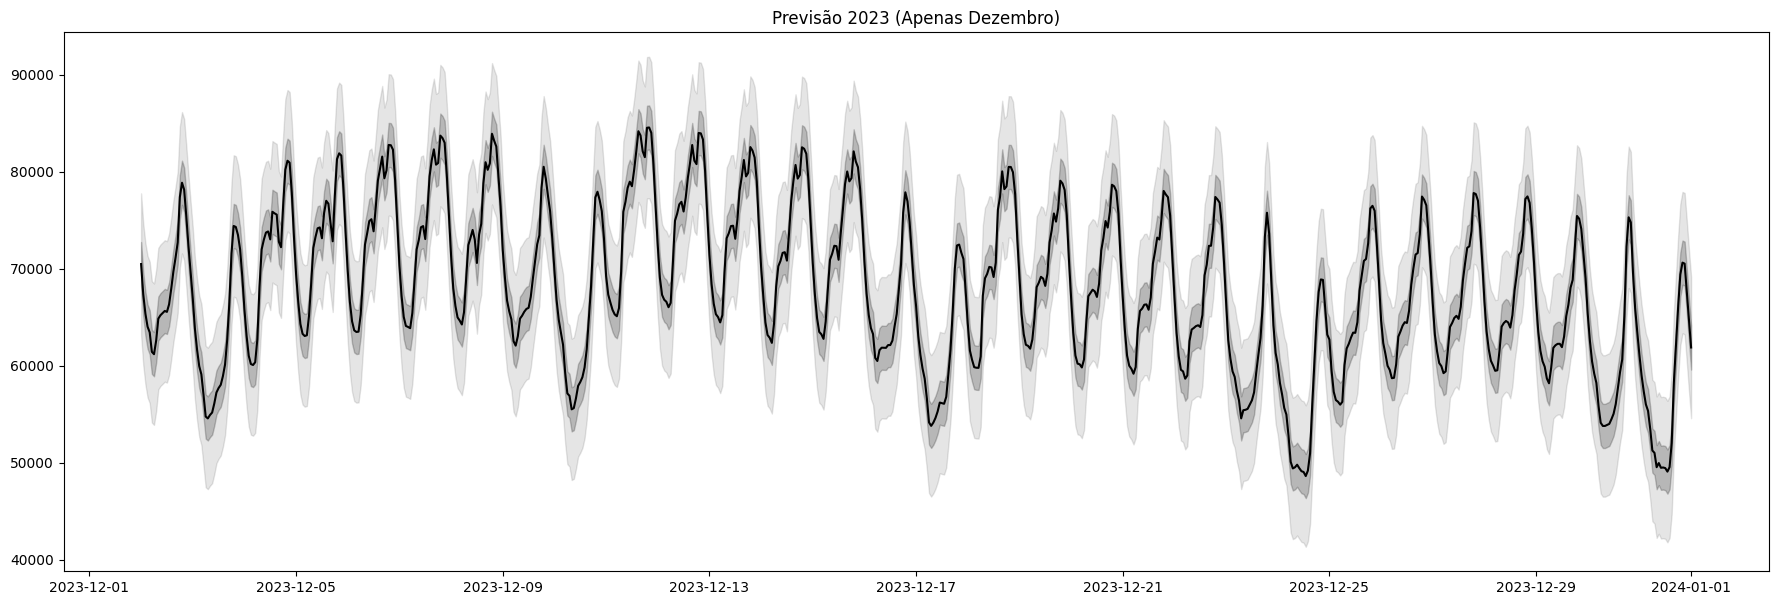

In [18]:
# Obtendo o índice correspondente à data '2023-12-01' no DataFrame futuro_df
index = len(futuro_df.loc[:'2023-12-01'])

# Separando as datas e as previsões a partir do índice obtido
x, y = datas[index:], prediction[index:]

# Configurando o tamanho da figura para exibição do gráfico
plt.figure(figsize=figsize)

# Plotando a linha da previsão no gráfico
plt.plot(x, y, color='black')

# Preenchendo a área entre as faixas dos percentis de 50% no gráfico
plt.fill_between(x, y - percentile50, y + percentile50, color='black', alpha=0.2)

# Preenchendo a área entre as faixas dos percentis de 95% no gráfico
plt.fill_between(x, y - percentile95, y + percentile95, color='black', alpha=0.1)

# Definindo o título do gráfico
plt.title('Previsão 2023 (Apenas Dezembro)')

# Exibindo o gráfico
plt.show()

pred_df.to_csv('prediction.csv')

In [22]:
dp = pd.read_csv('/content/prediction.csv',index_col = 'index',parse_dates = True)


dp['hora'] = df.index.hour
dp['dia_semana'] = df.index.day_of_week
dp['dia_mes'] = df.index.day
dp['dia_ano'] = df.index.day_of_year
dp['mes'] = df.index.month
dp['trimestre'] = df.index.quarter
dp['ano'] = df.index.year
dp.head()

ValueError: ignored